In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import random
from __future__ import division
from mpl_toolkits.mplot3d import Axes3D
from numba import jit
from math import sqrt
import time

In [ ]:
@jit
def Mandelbrot(c, iterations):
    z = complex(0, 0)
    for n in range(iterations):
        if abs(z) > 2:
            return(n)
        z = (z ** 2) + c
    return(iterations)

@jit
def IterativeFunction(set_bound, iterations, resolution):
    iterated_set = np.zeros((int(resolution), int(resolution)))
    for i, re in enumerate(np.linspace(set_bound[0], set_bound[1], int(resolution))):
        for k, im in enumerate(np.linspace(set_bound[2], set_bound[3], int(resolution))):
            iterated_set[i,k] = Mandelbrot(complex(re, im), int(iterations))
    return(iterated_set)

In [ ]:
@jit
def HitandMiss(darts, mandelbrot, iterations, resolution):
    thrown = 0
    inside = 0 
    while thrown < darts:
        a = random.randint(0, (resolution - 1))
        b = random.randint(0, (resolution - 1))
        if mandelbrot[a, b] >= iterations:
            inside += 1
        thrown += 1
    return(inside, thrown)

In [ ]:
# First define range of complex numbers for the mandelbrot set 
complex_lb = -1.25
complex_ub = 1.25
real_lb = -2.0
real_ub = 0.5

# Package bounds into a list 
set_bound = [real_lb, real_ub, complex_lb, complex_ub]

# Define a number of iterations for the Iterative Function
iterations = 2048.0

# Define granularity/resolution of the mandelbrot set 
resolution = 20000.0

In [ ]:
start = time.clock()
computed_set = IterativeFunction(set_bound, iterations, resolution).T
print (time.clock() - start)
plt.imshow(computed_set)
plt.show()
print (time.clock() - start)

# 87.51t (1000, 10000); 620t (10000, 10000); 38t (100, 10000), w/out @jit 787t; 179t (1000, 10000); 

In [ ]:
start = time.clock()
computed_set_2048_20000 = IterativeFunction(set_bound, iterations, resolution).T
print (time.clock() - start)
plt.imshow(computed_set)
plt.show()
print (time.clock() - start)

In [ ]:
plt.imshow(computed_set_2048_20000)
plt.show()

In [ ]:
# Investigate convergence properties, trying to minimise the error given from the resolution and the iterations. 
area_square = abs(complex_lb - complex_ub) * abs(real_lb - real_ub)

for i, iterations in enumerate(np.linspace(1, 1000)):
    for j, samples in enumerate(np.linspace(1, 10000, 1000)):
        inside, thrown = HitandMiss(samples, computed_set, iterations)
        area_mandelbrot = (float(inside) / thrown) * area_square
        results[i, j] = area_mandelbrot

In [ ]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.linspace(1, 1000)
Y = np.linspace(1, 10000, 1000)
X, Y = np.meshgrid(X, Y)
Z = results
print len(X)
print len(Y)
print results
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

In [ ]:
maxiter = 1001
maxdarts = 100001
results = np.zeros((10, 10))

for i, iterations in enumerate(np.linspace(10, maxiter, 10)):
    print iterations
    mandelbrot = IterativeFunction(set_bound, iterations, resolution)
    for j, darts in enumerate(np.linspace(100, maxdarts, 10)):
        inside = HitandMiss(darts, mandelbrot)
        area_square = abs(complex_lb - complex_ub) * abs(real_lb - real_ub)
        area_mandelbrot = float(inside) / darts * area_square
        results[i, j] = area_mandelbrot
        if iterations == 1001:
            if darts == 100001:
                best_approximation = area_mandelbrot

In [4]:
@jit
def mandelbrot(c,maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return maxiter

@jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)

In [5]:
start = time.clock()
masterset = mandelbrot_set(-2,0.5,-1.25,1.25,1000,1000,100000)[2].T
print time.clock() - start

151.767771


<IPython.core.display.Javascript object>


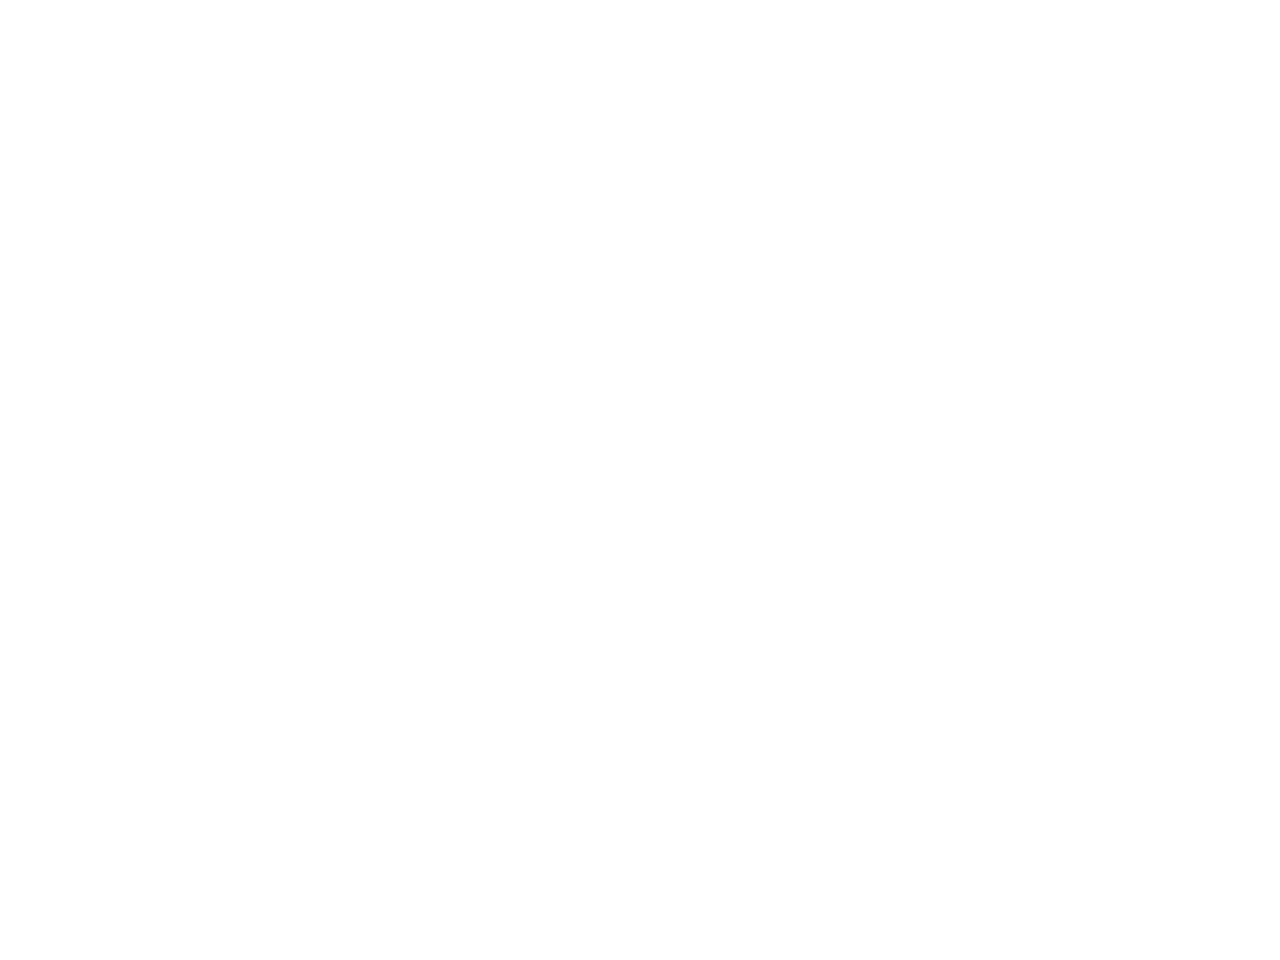

In [6]:
%matplotlib notebook
%matplotlib notebook
plt.imshow(masterset)
#plt.savefig("Mandelbrot")
plt.show()

In [7]:
start = time.clock()
BigBrot = mandelbrot_set(-2,0.5,-1.25,1.25,10000,10000,100000)[2].T
print time.clock() - start

14804.318996


<IPython.core.display.Javascript object>


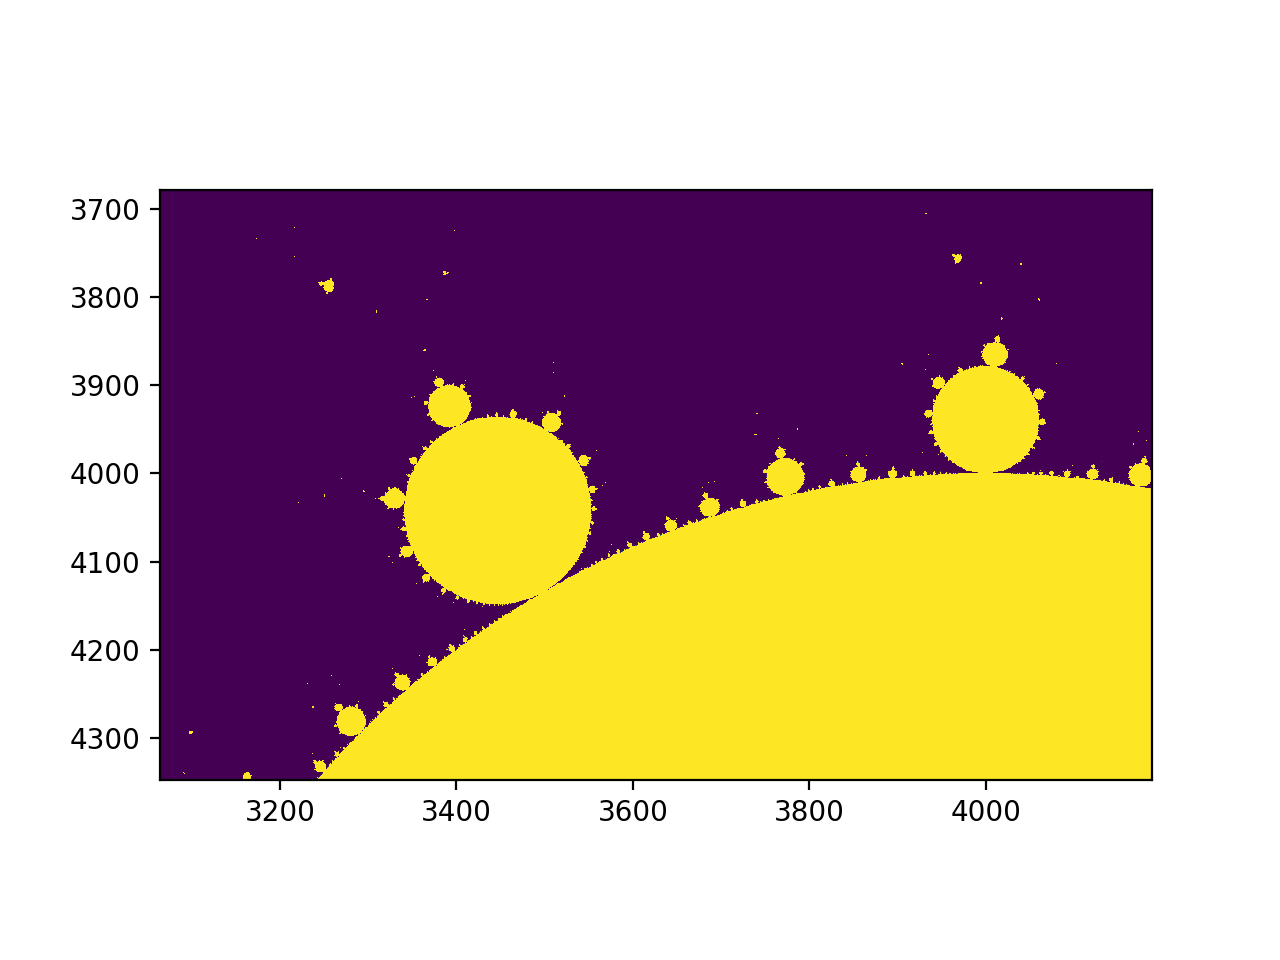

In [9]:
%matplotlib notebook
%matplotlib notebook
plt.imshow(BigBrot)
#plt.savefig("Mandelbrot")
plt.show()

In [ ]:
estimations = []
for x in range(100):
    inside = HitandMiss(10000, masterset, 1000, 10000)[0]
    area_square = abs(complex_lb - complex_ub) * abs(real_lb - real_ub)
    area_mandelbrot = float(inside) / 10000 * area_square
    estimations.append(area_mandelbrot)
print sum(estimations) / 100, np.std(estimations)**2

In [ ]:
plt.hist(estimations, bins = 20)
plt.show()

In [ ]:
plt.plot(estimations)
plt.show()

In [ ]:
def Estimations(function, mandelbrot, samples, runs):
    estimations = []
    for x in np.linspace(100, 2000, 100):
        areas = [] 
        for y in range(runs):
            inside = function(samples, mandelbrot, x, 10000)[0]
            area_square = abs(complex_lb - complex_ub) * abs(real_lb - real_ub)
            area_mandelbrot = float(inside) / 10000 * area_square
            areas.append(area_mandelbrot)
        std = np.std(areas)
        mean = sum(areas)/100
        low, high = ConfidenceInterval(std, 100, mean)
        estimations.append([mean, low, high])
    return(estimations)

In [ ]:
estimations2 = Estimations(HitandMiss, masterset, 10000, 100)

In [ ]:
def ConfidenceInterval(std, n, mean):
    low = mean - 1.96 * std/sqrt(n)
    high = mean + 1.96 * std/sqrt(n)
    return(low, high)

In [ ]:
estimations2 = np.array(estimations2)
plt.plot(np.linspace(100, 2000, 100), estimations2[:, 0])
plt.plot(np.linspace(100, 2000, 100), estimations2[:, 1], 'r--')
plt.plot(np.linspace(100, 2000, 100), estimations2[:, 2], 'r--')
plt.xlabel("Iterations")
plt.ylabel("Area")
plt.savefig("PureRandom")
plt.show()

In [ ]:
bestpure = estimations2[-1]
print bestpure

In [ ]:
plt.scatter(np.linspace(0, 2040, 2040), estimations2, label="estimation as a function of iterations")
#plt.plot(np.linspace(0, 1000, 1000), [min(estimations2) for x in np.linspace(0, 1000, 1000)], label="best estimation")
plt.legend(loc="best")
plt.show()

In [ ]:
# take estimations for i > 200 and average them
sensible_estimations = estimations2[200:]
average_estimation = sum(sensible_estimations) / len(sensible_estimations)
print average_estimation

In [ ]:
# create 1000 estimations with 2000 darts all at the same iteration count
estimations3 = []
for x in np.linspace(0, 1000, 1000):
    inside = HitandMiss(2000, newset, 1000, 2000)[0]
    area_square = abs(complex_lb - complex_ub) * abs(real_lb - real_ub)
    area_mandelbrot = float(inside) / 2000 * area_square
    estimations3.append(area_mandelbrot)

In [ ]:
average_estimation2 = sum(estimations3) / len(estimations3)
print average_estimation2

In [ ]:
plt.hist(estimations3, bins=20)
plt.show()

In [ ]:
std = np.std(estimations3)
print std

In [ ]:
@jit
def AntitheticVariables(darts, mandelbrot, iterations, resolution):
    thrown = 0
    inside = 0 
    while thrown < darts:
        a = random.randint(0, (resolution - 1))
        b = random.randint(0, (resolution - 1))
        if mandelbrot[a, b] >= iterations:
            inside += 1
        if mandelbrot[((resolution - 1) - a), ((resolution - 1) - b)] >= iterations:
            inside += 1
        thrown += 2
    return(inside, thrown)

In [ ]:
# create 1000 estimations with 2000 darts all at the same iteration count
estimations_antitheticvariables = []
for x in np.linspace(0, 1000, 1000):
    inside = AntitheticVariables(2000, newset, 1000, 2000)[0]
    area_square = abs(complex_lb - complex_ub) * abs(real_lb - real_ub)
    area_mandelbrot = float(inside) / 2000 * area_square
    estimations_antitheticvariables.append(area_mandelbrot)

In [ ]:
plt.hist(estimations_antitheticvariables, bins=20)
plt.show()
std = np.std(estimations_antitheticvariables)
print std

<p> Using antithetic variables the variance seems to be slightly reduced compared to the pure random sampling. A proper statistical test should be used to test if the variance is statistically different. For this we can use a t-test, to test the difference between means. </p> 
<h2> Latin Hypercube Sampling </h2>
<p> Hypercube sampling implemented this way is incorrect. The rows and columns must be permuted, such that we do not sample from the same row or column more than once. </p> 

In [ ]:
def AntitheticVariables(darts, mandelbrot, iterations, resolution):
    thrown = 0
    inside = 0 
    while thrown < darts:
        a = random.randint(0, (resolution - 1))
        b = random.randint(0, (resolution - 1))
        if mandelbrot[a, b] >= iterations:
            inside += 1
        if mandelbrot[((resolution - 1) - a), ((resolution - 1) - b)] >= iterations:
            inside += 1
        thrown += 2
    return(inside, thrown)

In [ ]:
def Intervals(M_intervals, samples, drawn):
    M = M_intervals
    selected_interval = random.randint(0, (samples - drawn)) + 1
    permuter = M[-drawn]
    M[-drawn] = M[selected_interval - 1]
    M[selected_interval - 1] = permuter
    #print selected_interval
    return(selected_interval, M)

In [ ]:
def coordinates(selected_interval, sqrt_samples, points):
    x_interval = selected_interval % sqrt_samples 
    y_interval = int(selected_interval / sqrt_samples)
    #print y_interval
    
    if x_interval > 0:
        lower_xbound = (x_interval - 1) * points
        upper_xbound = x_interval * points
    else: 
        lower_xbound = 0
        upper_xbound = points
    
    if y_interval > 0:
        lower_ybound = (y_interval - 1) * points
        upper_ybound = y_interval * points
    else: 
        lower_ybound = 0
        upper_ybound = points
        
    #print lower_ybound, upper_ybound
    #print lower_xbound, upper_xbound
    x_coord = random.randint(lower_xbound, upper_xbound)
    y_coord = random.randint(lower_ybound, upper_ybound)
    return(x_coord, y_coord)

In [ ]:
def LHS(mandelbrot, samples, iterations, resolution):
    drawn = 0
    inside = 0
    sqrt_samples = sqrt(samples)
    M_intervals = [x for x in range(1, (samples + 1))]
    points = resolution / sqrt_samples
    while drawn < samples:
        selected_interval, M_intervals = Intervals(M_intervals, samples, drawn)
        x_coord, y_coord = coordinates(selected_interval, sqrt_samples, points)
        if mandelbrot[y_coord, x_coord] >= iterations:
            inside += 1
        drawn += 1
    return(inside, drawn)

In [ ]:
print LHS(newset, 100, 10, 2000)

In [ ]:
# Indexing error, something is wrong in the calculation of the interval along the y axis when calculating y_coord
# need to make sure that the lower and upper bounds on y are in the right range that fits to the resolution of the 
# mandelbrot set.

In [ ]:
areas = []
for i in range(100):
    inside, drawn = LHS(newset, 10000, 100, 2000)
    area_square = abs(complex_lb - complex_ub) * abs(real_lb - real_ub)
    area_mandelbrot = inside / drawn * area_square
    areas.append(area_mandelbrot)

In [ ]:
print sum(areas)/100, np.std(areas)

<h2> Latin Hypercube Sampling: done right </h2>

In [ ]:
def Intervals(samples):
    
    x_space = [x for x in range(samples)]
    y_space = [x for x in range(samples)]

    np.random.shuffle(x_space)
    np.random.shuffle(y_space)
    
    sampling_space = []
    
    for i, elements in enumerate(x_space):
        sampling_space.append([y_space[i], elements])
        
    return(sampling_space)

def coordinates(interval, samples, points):
    
    if interval[1] > 0:
        lower_xbound = (interval[1] - 1) * points
        upper_xbound = interval[1] * points
    else: 
        lower_xbound = 0
        upper_xbound = points
    
    if interval[0] > 0:
        lower_ybound = (interval[0] - 1) * points
        upper_ybound = interval[0] * points
    else: 
        lower_ybound = 0
        upper_ybound = points
        
    #print lower_ybound, upper_ybound
    #print lower_xbound, upper_xbound
    
    lower_ybound = int(lower_ybound)
    lower_xbound = int(lower_xbound)
    upper_ybound = int(upper_ybound)        
    upper_xbound = int(upper_xbound)
    
    x_coord = random.randint(lower_xbound, upper_xbound)
    y_coord = random.randint(lower_ybound, upper_ybound)
    return(x_coord, y_coord)

def LHS2(mandelbrot, samples, iterations):
    
    resolution = len(mandelbrot[0,:])
    
    points = resolution / samples
    
    Ordered_spaces = Intervals(samples)
    
    hit = 0
    
    for spaces in Ordered_spaces:
        
        x_coord, y_coord = coordinates(spaces, samples, points)

        if mandelbrot[y_coord, x_coord] >= iterations:
            hit += 1
        if mandelbrot[((resolution - 1) - y_coord), ((resolution - 1) - x_coord)] >= iterations:
            hit += 1
    return(hit, samples)

In [ ]:
LHS_estimations = []
for x in np.linspace(100, 2000, 100):
    print x
    areas = [] 
    for y in range(100):
        inside = LHS2(masterset, 10000, x)[0]
        area_square = abs(complex_lb - complex_ub) * abs(real_lb - real_ub)
        area_mandelbrot = float(inside) / 10000 * area_square
        areas.append(area_mandelbrot)
    std = np.std(areas)
    mean = sum(areas)/100
    low, high = ConfidenceInterval(std, 100, mean)
    LHS_estimations.append([mean, low, high])

In [ ]:
bestLHS = LHS_estimations[-1]
print bestLHS

In [ ]:
LHS_antithetic_estimations = []
for x in np.linspace(100, 2000, 100):
    print x
    areas = [] 
    for y in range(100):
        inside = LHS2(masterset, 10000, x)[0]
        area_square = abs(complex_lb - complex_ub) * abs(real_lb - real_ub)
        area_mandelbrot = float(inside) / 10000 * area_square
        areas.append(area_mandelbrot)
    std = np.std(areas)
    mean = sum(areas)/100
    low, high = ConfidenceInterval(std, 100, mean)
    LHS_antithetic_estimations.append([mean, low, high])

In [ ]:
bestLHSanti = LHS_antithetic_estimations[-1]
print bestLHSanti

In [ ]:
LHS_antithetic_estimations = LHS_antithetic_estimations / 2

LHS_antithetic_estimations = np.array(LHS_antithetic_estimations)
plt.plot(np.linspace(100, 2000, 100), LHS_antithetic_estimations[:, 0])
plt.plot(np.linspace(100, 2000, 100), LHS_antithetic_estimations[:, 1], 'r--')
plt.plot(np.linspace(100, 2000, 100), LHS_antithetic_estimations[:, 2], 'r--')
plt.xlabel("Iterations")
plt.ylabel("Area")
plt.savefig("LatinHypercubeAntithetic")
plt.show()

In [ ]:
best_antithetic = LHS_antithetic_estimations[-1]
print best_antithetic

In [ ]:
LHS_estimations = np.array(LHS_estimations)
plt.plot(np.linspace(100, 2000, 100), LHS_estimations[:, 0])
plt.plot(np.linspace(100, 2000, 100), LHS_estimations[:, 1], 'r--')
plt.plot(np.linspace(100, 2000, 100), LHS_estimations[:, 2], 'r--')
plt.xlabel("Iterations")
plt.ylabel("Area")
plt.savefig("LatinHypercube")
plt.show()

In [ ]:
# Calculation of mean and variance of the samples from a Latin Hypercube

X = LHS2(newset, 10000, 999)
X_ = X[0] / X[1]
X_var = X_ * (1 - X_)

print X_, X_var, X[0]

In [ ]:
# Calculation of mean and variance of the samples from random sampling 

Y = HitandMiss(10000, newset, 999, 2000)
Y_ = Y[0] / Y[1]
Y_var = Y_ * (1 - Y_)

print Y_, Y_var, Y[0]

In [ ]:
areas = []
for j in range(50, 1001):
    for i in range(100):
        mandelbrot = []
        inside, drawn = LHS2(masterset, 10000, j)
        area_square = abs(complex_lb - complex_ub) * abs(real_lb - real_ub)
        area_mandelbrot = inside / drawn * area_square
        mandelbrot.append(area_mandelbrot)
    mean = sum(mandelbrot)/100
    areas.append(mean)

In [ ]:
print sum(areas)/100, np.std(areas)

In [ ]:
# something is wrong with the code. At the moment my number of samples determines the amount of spaces that are sampled from
# in theory at least 

In [ ]:
CI = [(sum(areas)/100 - 1.96*(np.std(areas))**2/10), (sum(areas)/100 + 1.96*(np.std(areas))**2/10)]
print CI

In [ ]:
# Area of Master Mandelbrot set as calculated by looking at all the numbers in the grid that = maxiter
x = 0 
masterset_array = np.array(masterset)
for i in range(len(masterset[0,:])):
    for j in range(len(masterset[:,0])):
        if masterset[i,j] == 2048:
            x += 1

In [ ]:
print x / (len(masterset[0,:]) * len(masterset[:,0])) * area_square

<h2> Orthogonal Sampling </h2>

In [ ]:
def Intervals(xmin, xmax, ymin, ymax):
    
    x_space = [x for x in range(xmin, xmax)]
    y_space = [x for x in range(ymin, ymax)]

    np.random.shuffle(x_space)
    np.random.shuffle(y_space)
    
    sampling_space = []
    
    for i, elements in enumerate(x_space):
        sampling_space.append([y_space[i], elements])
        
    return(sampling_space)

def coords(xmin, xmax, ymin, ymax):
    
    x_coord = random.randint(xmin, xmax)
    y_coord = random.randint(ymin, ymax)
    
    return(x_coord, y_coord)

def boundaries(interval, points):
        
    if interval[1] > 0:
        lower_xbound = (interval[1] - 1) * points
        upper_xbound = interval[1] * points
    else: 
        lower_xbound = 0
        upper_xbound = points
    
    if interval[0] > 0:
        lower_ybound = (interval[0] - 1) * points
        upper_ybound = interval[0] * points
    else: 
        lower_ybound = 0
        upper_ybound = points
        
    ymin = int(lower_ybound)
    xmin = int(lower_xbound)
    ymax = int(upper_ybound)        
    xmax = int(upper_xbound)
    
    return(xmin, xmax, ymin, ymax)

def orthogonal(mandelbrot, major, iterations):
    
    resolution = len(mandelbrot[0,:])
    
    samples = major * major 
    
    points = resolution / samples
    
    Major_spaces = Intervals(0, major, 0, major)
    
    hit = 0
    
    x_coordinates = []
    y_coordinates = []
    for spaces in Major_spaces:
        
        xmin, xmax, ymin, ymax = boundaries(spaces, points)
        #print xmin, xmax, ymin, ymax
        Minor_space = Intervals(xmin * major, xmax * major, ymin * major, ymax * major)
        #print Minor_space
        for minor_spaces in Minor_space:
            
            xmin, xmax, ymin, ymax = boundaries(minor_spaces, points)
            
            x_coord, y_coord = coords(xmin, xmax, ymin, ymax)
            x_coordinates.append(x_coord)
            y_coordinates.append(y_coord)
           #print x_coord, y_coord
            if mandelbrot[y_coord, x_coord] >= iterations:
                hit += 1
            
    return(hit, samples, x_coordinates, y_coordinates)

In [ ]:
hit, samples, x, y = orthogonal(masterset, 100, 1000)

In [ ]:
plt.scatter(x, y, s=0.1)
plt.show()

In [ ]:
Ortho_estimations = []
for x in np.linspace(100, 2000, 100):
    print x
    areas = []
    for y in range(100):
        inside = orthogonal(masterset, 100, x)[0]
        area_square = abs(complex_lb - complex_ub) * abs(real_lb - real_ub)
        area_mandelbrot = float(inside) / 10000 * area_square
        areas.append(area_mandelbrot)
    std = np.std(areas)
    mean = sum(areas)/100
    low, high = ConfidenceInterval(std, 100, mean)
    Ortho_estimations.append([mean, low, high])

In [ ]:
bestortho = Ortho_estimations[-1]
print bestortho

In [ ]:
Ortho_estimations = np.array(LHS_estimations)
plt.plot(np.linspace(100, 2000, 100), Ortho_estimations[:, 0])
plt.plot(np.linspace(100, 2000, 100), Ortho_estimations[:, 1], 'r--')
plt.plot(np.linspace(100, 2000, 100), Ortho_estimations[:, 2], 'r--')
plt.xlabel("Iterations")
plt.ylabel("Area")
plt.savefig("Orthogonal")
plt.show()

In [ ]:
print sum(areas_ortho)/100, np.std(areas_ortho)

In [ ]:
CI = [(sum(areas_ortho)/100 - 1.96*(np.std(areas_ortho))**2/10), (sum(areas_ortho)/100 + 1.96*(np.std(areas_ortho))**2/10)]
print CI

In [ ]:
1.5081 * 1/2.5**2